Yidan Chen

Collab Link: https://colab.research.google.com/drive/1IlkPPh9Ioj8UkbRR5OrFdNToCDXC0RDr?usp=sharing

In [51]:
#import stuff here
#ancova using pinguin
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install dfply
from dfply import *
%pip install pingouin
from pingouin import ancova
import numpy as np
from scipy.stats import shapiro, levene


In [3]:
from google.colab import drive
# Mount file to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
df=pd.read_csv('/content/drive/MyDrive/2178/INF2178_A3_data.csv')

In [53]:
df.head(10)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
5,50.45,36.27,33.352,64.13,53.31,32.703,150000.0,150.0,3
6,32.49,20.82,26.211,38.52,29.09,29.612,42000.0,42.0,2
7,33.30,26.85,27.072,36.72,32.22,33.730,70000.0,70.0,3
8,65.92,47.36,33.514,84.61,59.89,42.359,100000.0,100.0,3
9,34.20,22.27,28.096,39.87,27.44,32.374,78000.0,78.0,3


In [54]:
#checking data types
data_types = df.dtypes
data_types

fallreadingscore               float64
fallmathscore                  float64
fallgeneralknowledgescore      float64
springreadingscore             float64
springmathscore                float64
springgeneralknowledgescore    float64
totalhouseholdincome           float64
incomeinthousands              float64
incomegroup                      int64
dtype: object

In [55]:
#checking data shape
df.shape

(11933, 9)

In [56]:
#incomegroup is of type int64. For ANCOVA, independent variable should be categorical.
df['incomegroup'] = df['incomegroup'].astype('category')

In [57]:
#double checking data types
data_types = df.dtypes
data_types

fallreadingscore                float64
fallmathscore                   float64
fallgeneralknowledgescore       float64
springreadingscore              float64
springmathscore                 float64
springgeneralknowledgescore     float64
totalhouseholdincome            float64
incomeinthousands               float64
incomegroup                    category
dtype: object

In [58]:
# Checking for missing values
missing_values_key_columns = df.isnull().sum()
missing_values_key_columns

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64

In [59]:
# Summary statistics
df.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000


In [60]:
# Dropping the 'totalhouseholdincome' column，simplify the dataset and drop redundant variable
df = df.drop(columns=['totalhouseholdincome'])

In [61]:
#Adding new columns
# Calculate the change in reading scores from fall to spring
df['change_in_reading'] = df['springreadingscore'] - df['fallreadingscore']

# Calculate the change in math scores from fall to spring
df['change_in_math'] = df['springmathscore'] - df['fallmathscore']


df.head(10)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,incomeinthousands,incomegroup,change_in_reading,change_in_math
0,36.58,39.54,33.822,49.37,50.10,40.533,140.0,3,12.79,10.56
1,50.82,44.44,38.147,83.50,58.93,37.409,120.0,3,32.68,14.49
2,40.68,28.57,28.108,40.41,32.81,29.312,90.0,3,-0.27,4.24
3,32.57,23.57,15.404,34.14,35.25,27.382,50.0,2,1.57,11.68
4,31.98,19.65,18.727,32.84,23.60,26.977,55.0,2,0.86,3.95
5,50.45,36.27,33.352,64.13,53.31,32.703,150.0,3,13.68,17.04
6,32.49,20.82,26.211,38.52,29.09,29.612,42.0,2,6.03,8.27
7,33.30,26.85,27.072,36.72,32.22,33.730,70.0,3,3.42,5.37
8,65.92,47.36,33.514,84.61,59.89,42.359,100.0,3,18.69,12.53
9,34.20,22.27,28.096,39.87,27.44,32.374,78.0,3,5.67,5.17


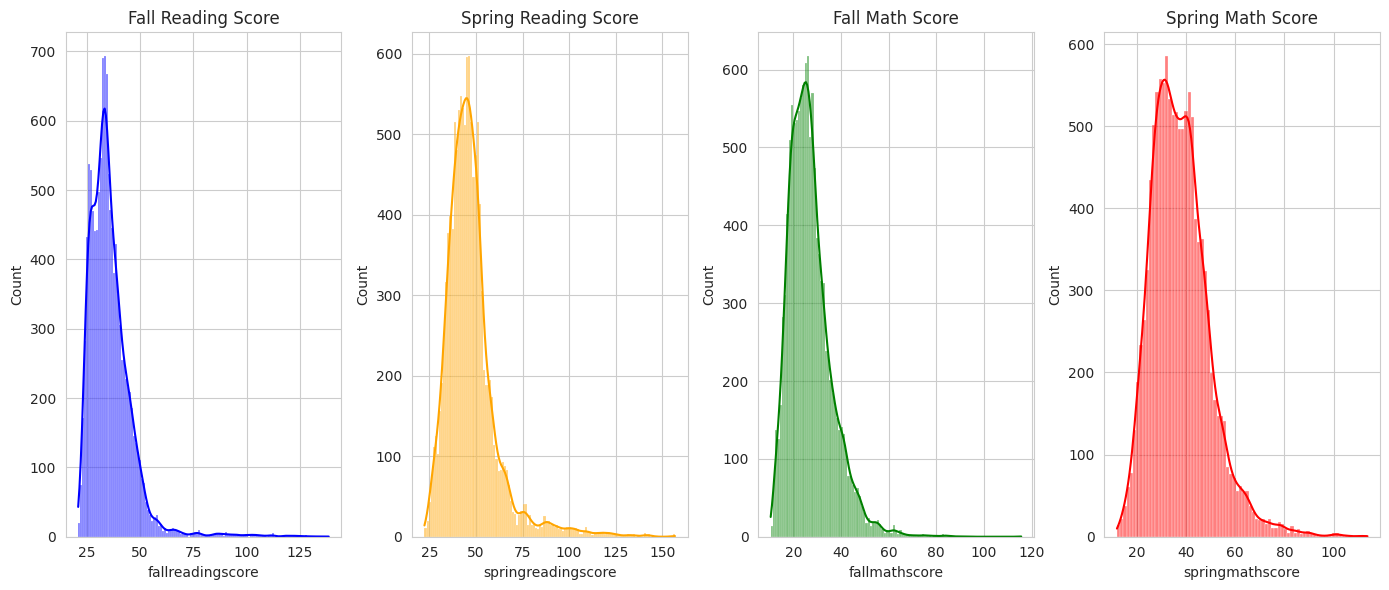

In [63]:
#Histogram of Fall/Spring Reading & Math scores to visualize the distribution of data
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot histograms for reading scores
plt.subplot(1, 4, 1) # 1 row, 4 columns, subplot 1
sns.histplot(df['fallreadingscore'], kde=True, color="blue")
plt.title('Fall Reading Score')

plt.subplot(1, 4, 2) # 1 row, 4 columns, subplot 2
sns.histplot(df['springreadingscore'], kde=True, color="orange")
plt.title('Spring Reading Score')

# Plot histograms for math scores
plt.subplot(1, 4, 3) # 1 row, 4 columns, subplot 3
sns.histplot(df['fallmathscore'], kde=True, color="green")
plt.title('Fall Math Score')

plt.subplot(1, 4, 4) # 1 row, 4 columns, subplot 4
sns.histplot(df['springmathscore'], kde=True, color="red")
plt.title('Spring Math Score')

# Display the plot
plt.tight_layout()
plt.show()


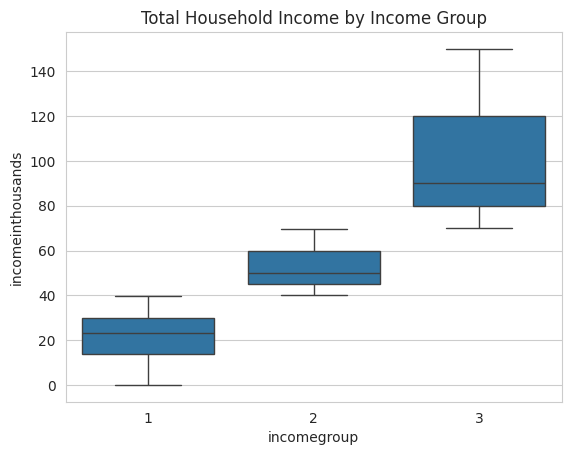

In [64]:
#boxplot shows Total Household Income by Income Group
sns.boxplot(x='incomegroup', y='incomeinthousands', data=df)
plt.title('Total Household Income by Income Group')
plt.show()

<ipython-input-66-9e30b59312b6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="incomegroup", y="fallmathscore", palette="viridis", ax=axs[0, 1])
<ipython-input-66-9e30b59312b6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="incomegroup", y="fallreadingscore", palette="viridis", ax=axs[1, 1])


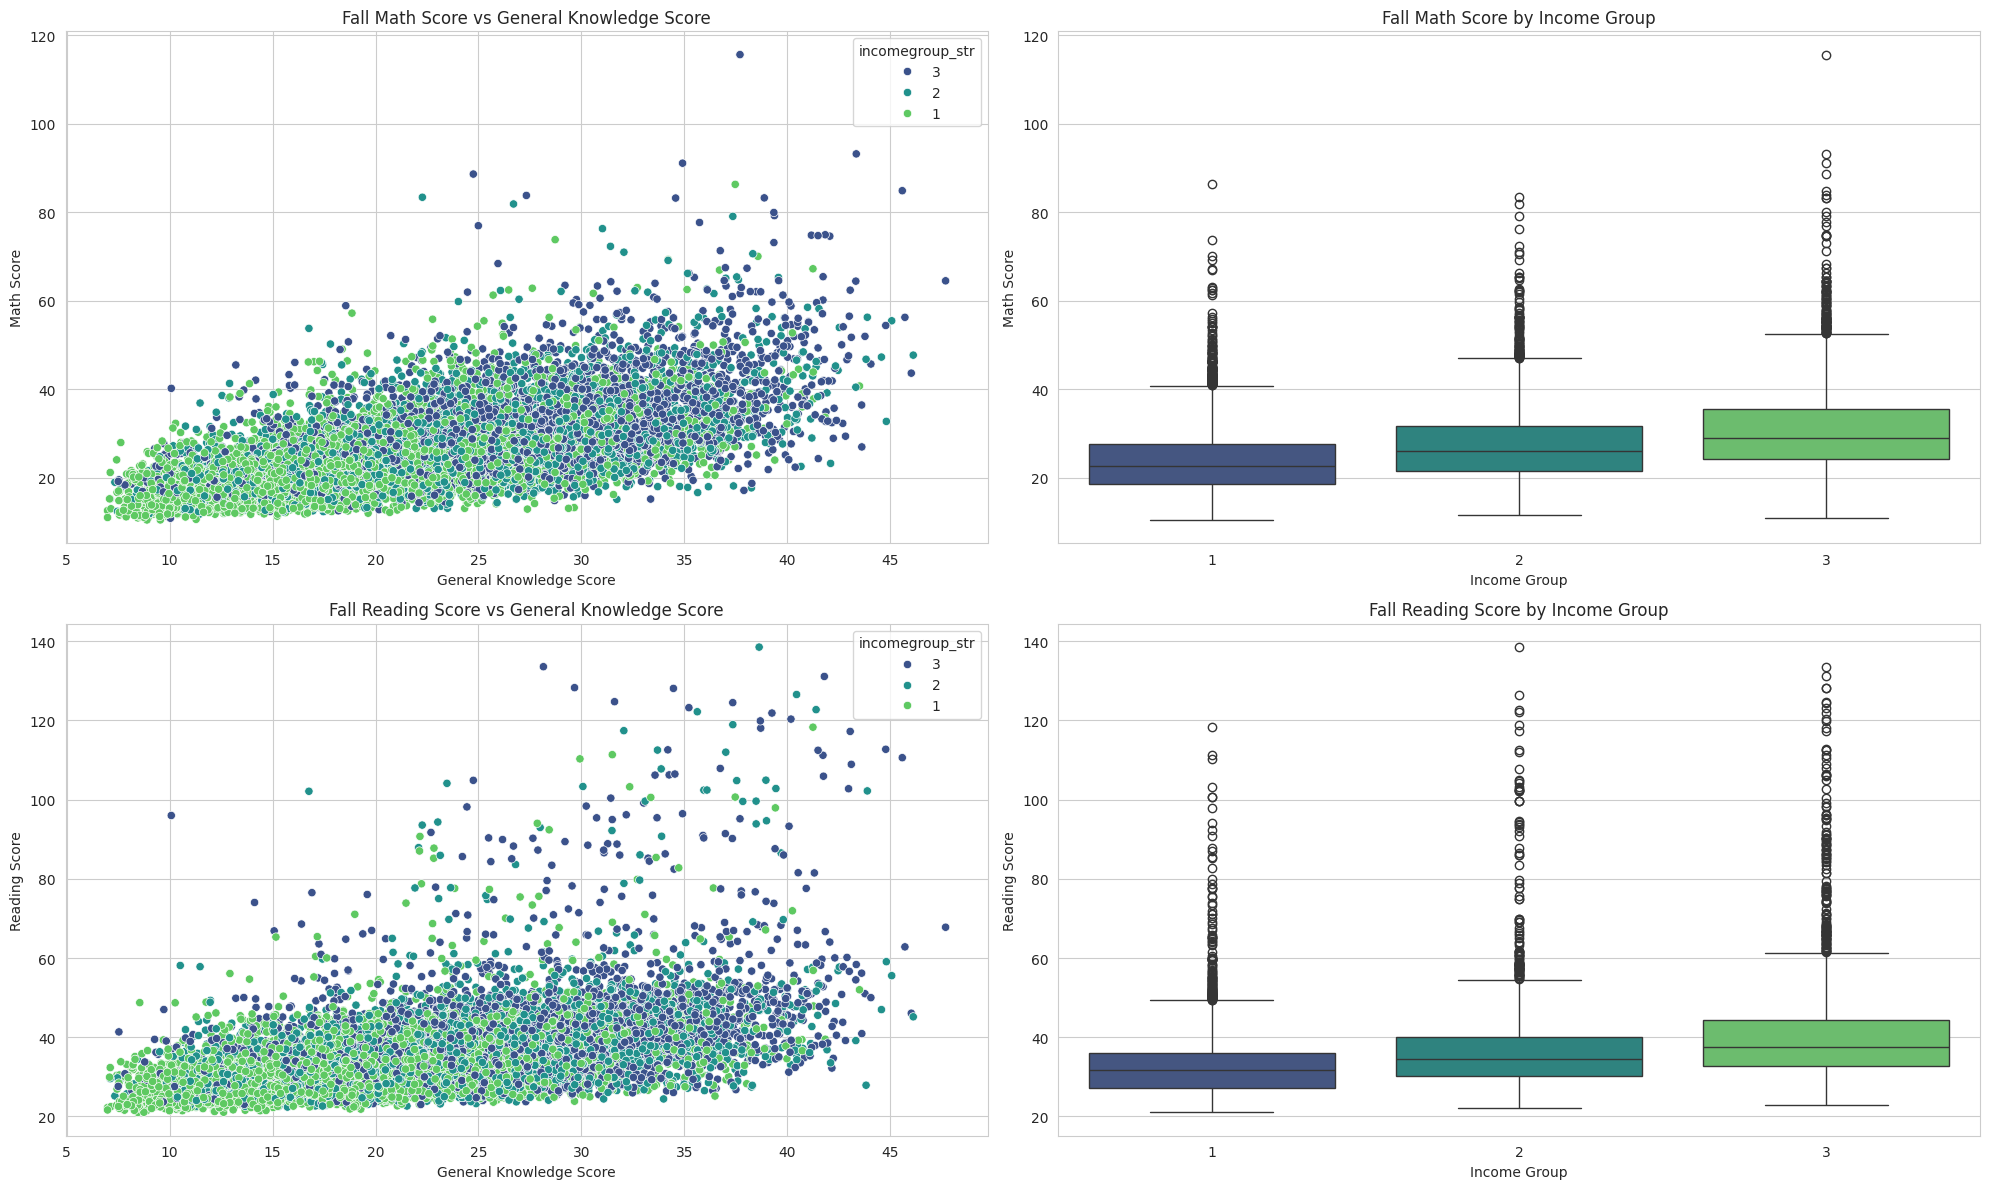

In [66]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Convert 'incomegroup' to a string for coloring purposes
df['incomegroup_str'] = df['incomegroup'].astype(str)

# Create a figure with subplots arranged in 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Scatter plot for Fall Math Score vs General Knowledge Score
sns.scatterplot(data=df, x="fallgeneralknowledgescore", y="fallmathscore", hue="incomegroup_str", palette="viridis", ax=axs[0, 0])
axs[0, 0].set_title('Fall Math Score vs General Knowledge Score')
axs[0, 0].set_xlabel('General Knowledge Score')
axs[0, 0].set_ylabel('Math Score')

# Boxplot for Income Groups vs Fall Math Score
sns.boxplot(data=df, x="incomegroup", y="fallmathscore", palette="viridis", ax=axs[0, 1])
axs[0, 1].set_title('Fall Math Score by Income Group')
axs[0, 1].set_xlabel('Income Group')
axs[0, 1].set_ylabel('Math Score')

# Scatter plot for Fall Reading Score vs General Knowledge Score
sns.scatterplot(data=df, x="fallgeneralknowledgescore", y="fallreadingscore", hue="incomegroup_str", palette="viridis", ax=axs[1, 0])
axs[1, 0].set_title('Fall Reading Score vs General Knowledge Score')
axs[1, 0].set_xlabel('General Knowledge Score')
axs[1, 0].set_ylabel('Reading Score')

# Boxplot for Income Groups vs Fall Reading Score
sns.boxplot(data=df, x="incomegroup", y="fallreadingscore", palette="viridis", ax=axs[1, 1])
axs[1, 1].set_title('Fall Reading Score by Income Group')
axs[1, 1].set_xlabel('Income Group')
axs[1, 1].set_ylabel('Reading Score')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [68]:
# create a table that summarizes the statistics shown in the boxplot for total household income by income group.
# This will include the minimum, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum values.

income_stats = df.groupby('incomegroup')['incomeinthousands'].describe()
income_stats = income_stats[['min', '25%', '50%', '75%', 'max']]

# Display the table
income_stats.reset_index()


,incomegroup,min,25%,50%,75%,max
0,1,0.001,14.0,23.0,30.0,39.799999
1,2,40.000,45.0,50.0,60.0,69.699997
2,3,70.000,80.0,90.0,120.0,150.000000


<ipython-input-69-05b1f418135b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='incomegroup', y='change_in_reading', data=df, palette="Set2")
<ipython-input-69-05b1f418135b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='incomegroup', y='change_in_math', data=df, palette="Set3")


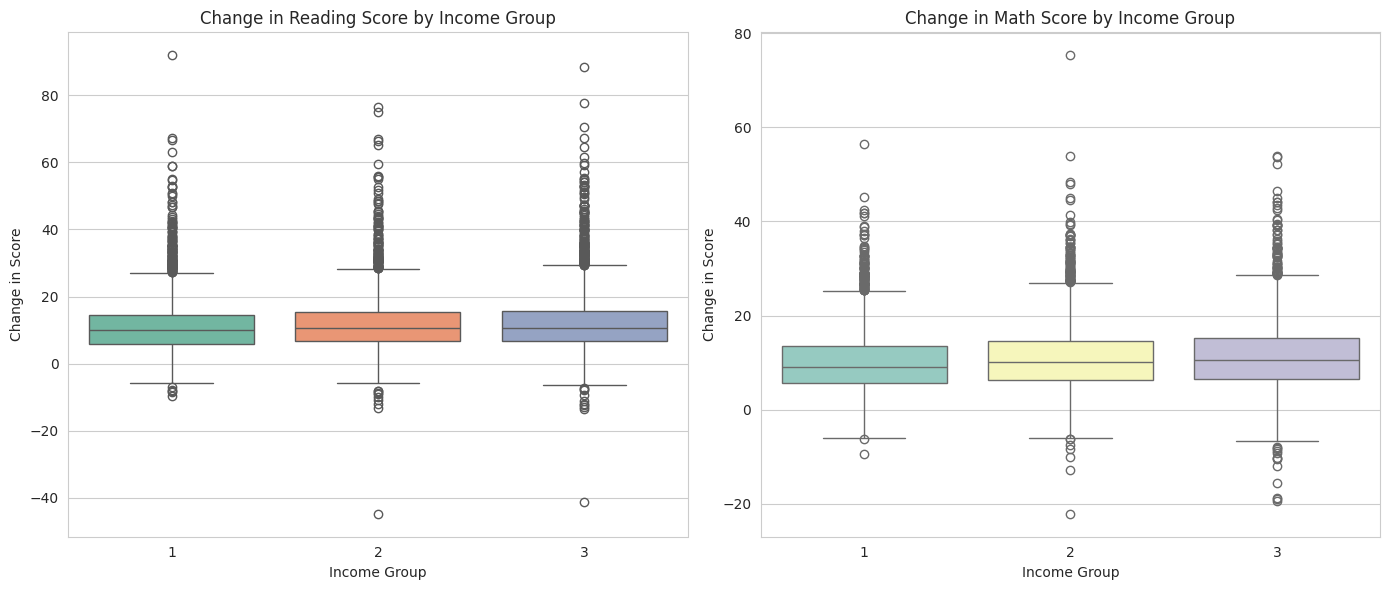

In [69]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Boxplot for Change in Reading Score by Income Group
plt.subplot(1, 2, 1) # 1 row, 2 columns, subplot 1
sns.boxplot(x='incomegroup', y='change_in_reading', data=df, palette="Set2")
plt.title('Change in Reading Score by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Change in Score')

# Boxplot for Change in Math Score by Income Group
plt.subplot(1, 2, 2) # 1 row, 2 columns, subplot 2
sns.boxplot(x='incomegroup', y='change_in_math', data=df, palette="Set3")
plt.title('Change in Math Score by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Change in Score')

# Display the plots
plt.tight_layout()
plt.show()

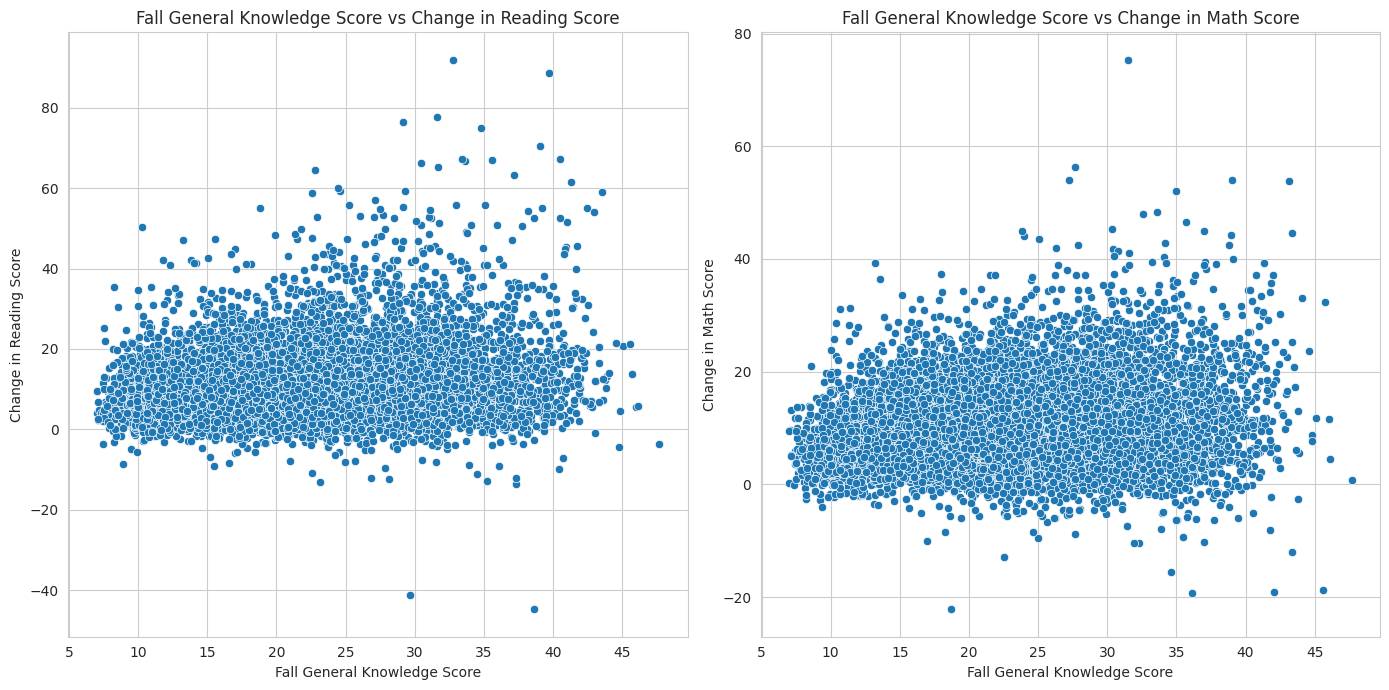

In [70]:
#didn't include for narrative
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with subplots for the two scatter plots
plt.figure(figsize=(14, 7))

# Scatter plot for Fall General Knowledge Score vs Change in Reading Score
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='fallgeneralknowledgescore', y='change_in_reading')
plt.title('Fall General Knowledge Score vs Change in Reading Score')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Change in Reading Score')

# Scatter plot for Fall General Knowledge Score vs Change in Math Score
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='fallgeneralknowledgescore', y='change_in_math')
plt.title('Fall General Knowledge Score vs Change in Math Score')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Change in Math Score')

# Display the plots
plt.tight_layout()
plt.show()


<ipython-input-72-e0d847fca71e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


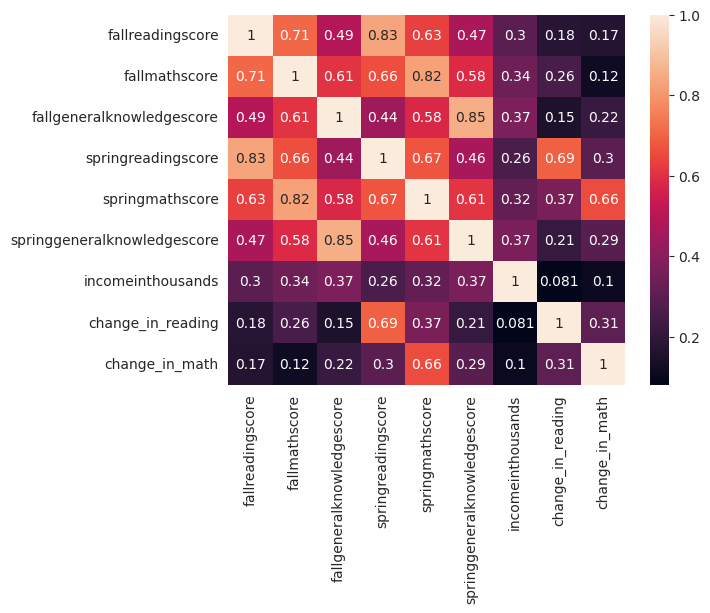

In [72]:
#Correlation Matrix for detailed information among all variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# ANCOVA Analysis

Reading Score

In [73]:
# One-Way ANCOVAs for change in reading scores by income group with Covariates as fall general knowledge
ancova(data=df, dv='change_in_reading', covar='fallgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,287.485906,2,2.251247,1.053126e-01,0.000377
1,fallgeneralknowledgescore,14054.124684,1,220.110317,2.354473e-49,0.018117
2,Residual,761671.036393,11929,NaN,NaN,NaN


In [74]:
# Fit ANCOVA model using OLS
model_reading = ols('change_in_reading ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()

# Print the model summary to get an overview of the model's performance
model_reading_summary = model_reading.summary()
print(model_reading_summary)

                            OLS Regression Results                            
Dep. Variable:      change_in_reading   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     95.49
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           4.52e-61
Time:                        23:19:51   Log-Likelihood:                -41730.
No. Observations:               11933   AIC:                         8.347e+04
Df Residuals:                   11929   BIC:                         8.350e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [75]:
#Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model_reading.resid)
print(w,pvalue)

0.8996317386627197 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [76]:
#Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed

from scipy.stats import levene

# Perform Levene's test for homogeneity of variances
statistic, p_value = levene(df['change_in_reading'][df['incomegroup'] == 1],
                            df['change_in_reading'][df['incomegroup'] == 2],
                            df['change_in_reading'][df['incomegroup'] == 3])

# Print the summary of Levene's test
print(f"Levene's test statistic: {statistic}, p-value: {p_value}")


Levene's test statistic: 19.7280103692154, p-value: 2.794929503613517e-09


Math Score

In [77]:
# One-Way ANCOVAs for change in math scores by income group with Covariates as fall general knowledge
ancova(data=df, dv='change_in_math', covar='fallgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,55.879616,2,0.624286,5.356614e-01,0.000105
1,fallgeneralknowledgescore,22425.932956,1,501.083959,9.425259e-109,0.040312
2,Residual,533880.499781,11929,NaN,NaN,NaN


In [78]:
# Fit ANCOVA model using OLS
model_math = ols('change_in_math~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()

# Print the model summary to get an overview of the model's performance
model_math_summary = model_math.summary()
print(model_math_summary)

                            OLS Regression Results                            
Dep. Variable:         change_in_math   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sat, 23 Mar 2024   Prob (F-statistic):          1.36e-126
Time:                        23:20:00   Log-Likelihood:                -39610.
No. Observations:               11933   AIC:                         7.923e+04
Df Residuals:                   11929   BIC:                         7.926e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [79]:
#Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model_math.resid)
print(w,pvalue)

0.9664044380187988 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [80]:
#Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed

from scipy.stats import levene

# Perform Levene's test for homogeneity of variances
statistic, p_value = levene(df['change_in_math'][df['incomegroup'] == 1],
                            df['change_in_math'][df['incomegroup'] == 2],
                            df['change_in_math'][df['incomegroup'] == 3])

# Print the summary of Levene's test
print(f"Levene's test statistic: {statistic}, p-value: {p_value}")


Levene's test statistic: 22.215180179067378, p-value: 2.344180384098772e-10


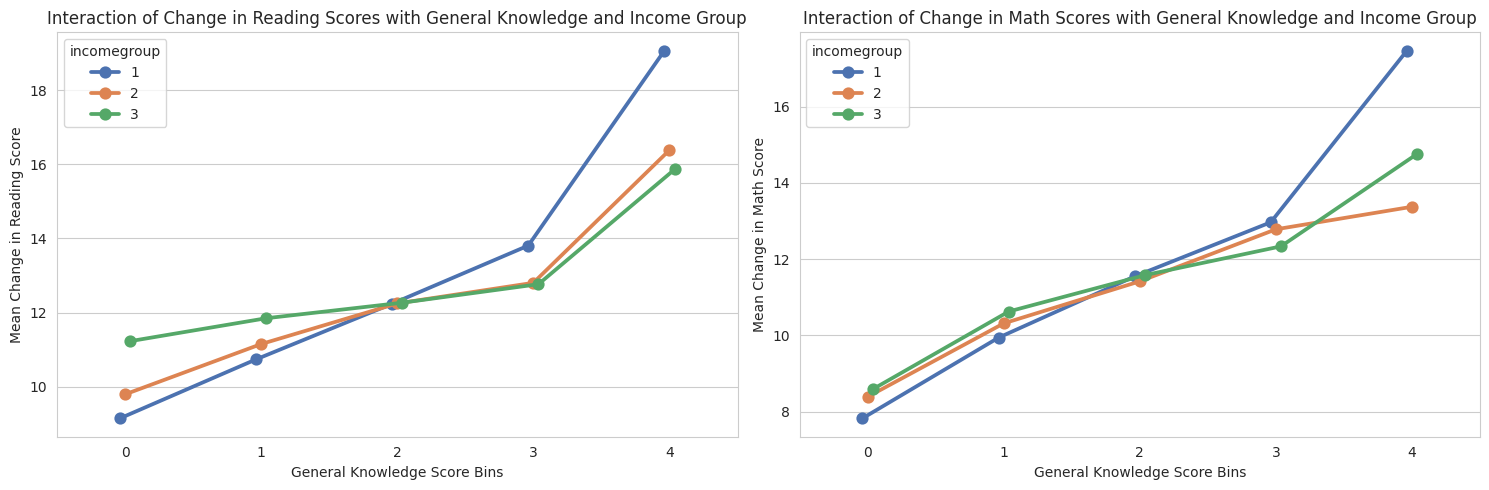

In [81]:
# We will create bins for the 'fallgeneralknowledgescore' to simplify the interaction plot.
# Additionally, we will use the mean change in scores for each bin as the y-axis.

# Creating bins for 'fallgeneralknowledgescore'
df['knowledge_bins'] = pd.cut(df['fallgeneralknowledgescore'], bins=5, labels=False)

# Calculate the mean change in scores for each bin and income group
mean_reading_change = df.groupby(['knowledge_bins', 'incomegroup'])['change_in_reading'].mean().reset_index()
mean_math_change = df.groupby(['knowledge_bins', 'incomegroup'])['change_in_math'].mean().reset_index()

# Now we plot the interaction of these means with income group and binned knowledge scores
plt.figure(figsize=(15, 5))

# Plot for Change in Reading Scores
plt.subplot(1, 2, 1)
sns.pointplot(data=mean_reading_change, x='knowledge_bins', y='change_in_reading', hue='incomegroup', palette='deep', dodge=True)
plt.title('Interaction of Change in Reading Scores with General Knowledge and Income Group')
plt.xlabel('General Knowledge Score Bins')
plt.ylabel('Mean Change in Reading Score')

# Plot for Change in Math Scores
plt.subplot(1, 2, 2)
sns.pointplot(data=mean_math_change, x='knowledge_bins', y='change_in_math', hue='incomegroup', palette='deep', dodge=True)
plt.title('Interaction of Change in Math Scores with General Knowledge and Income Group')
plt.xlabel('General Knowledge Score Bins')
plt.ylabel('Mean Change in Math Score')

plt.tight_layout()
plt.show()
